In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [6]:
import os
for dirname, _, filenames in os.walk('../../Data/FuentesOriginales/USAR/world_population.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
filepath = "../../Data/FuentesOriginales/USAR/world_population.csv"
df = pd.read_csv(filepath)
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


LIMPIEZA DE DATOS

In [8]:
print(f"Shape of DataFrame:\n {df.shape}")
print(df.columns.values)

Shape of DataFrame:
 (234, 17)
['Rank' 'CCA3' 'Country/Territory' 'Capital' 'Continent' '2022 Population'
 '2020 Population' '2015 Population' '2010 Population' '2000 Population'
 '1990 Population' '1980 Population' '1970 Population' 'Area (km²)'
 'Density (per km²)' 'Growth Rate' 'World Population Percentage']


In [9]:
for column in df.columns:
    print(f"{column} ---> {df[column].nunique()}")

Rank ---> 234
CCA3 ---> 234
Country/Territory ---> 234
Capital ---> 234
Continent ---> 6
2022 Population ---> 234
2020 Population ---> 234
2015 Population ---> 234
2010 Population ---> 234
2000 Population ---> 234
1990 Population ---> 234
1980 Population ---> 234
1970 Population ---> 234
Area (km²) ---> 233
Density (per km²) ---> 234
Growth Rate ---> 180
World Population Percentage ---> 70


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [11]:
df.describe().T.sort_values("50%", ascending = False).style.background_gradient(cmap = "RdPu")\
    .bar(subset = ["mean"], color = "red").bar(subset = ["max"], color = "green")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Rank,234.000000,117.500000,67.694165,1.000000,59.250000,117.500000,175.750000,234.000000


REVISANDO NAM

In [12]:
for column in df.columns:
    print(column)
    print(f"{df[column].isnull().value_counts()}\n")

Rank
Rank
False    234
Name: count, dtype: int64

CCA3
CCA3
False    234
Name: count, dtype: int64

Country/Territory
Country/Territory
False    234
Name: count, dtype: int64

Capital
Capital
False    234
Name: count, dtype: int64

Continent
Continent
False    234
Name: count, dtype: int64

2022 Population
2022 Population
False    234
Name: count, dtype: int64

2020 Population
2020 Population
False    234
Name: count, dtype: int64

2015 Population
2015 Population
False    234
Name: count, dtype: int64

2010 Population
2010 Population
False    234
Name: count, dtype: int64

2000 Population
2000 Population
False    234
Name: count, dtype: int64

1990 Population
1990 Population
False    234
Name: count, dtype: int64

1980 Population
1980 Population
False    234
Name: count, dtype: int64

1970 Population
1970 Population
False    234
Name: count, dtype: int64

Area (km²)
Area (km²)
False    234
Name: count, dtype: int64

Density (per km²)
Density (per km²)
False    234
Name: count, dtype: i

In [13]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

REVISANDO VALORES DUPLICADOS

In [14]:
df.duplicated().sum()

0

ELIMINANDO COLUMNAS NO NECESARIAS

In [15]:
df.drop("CCA3", axis = 1, inplace = True)
df.rename({"Country/Territory":"Country", 
          '2022 Population': 2022,
          '2020 Population': 2020,
          '2015 Population': 2015, 
          '2010 Population': 2010, 
          '2000 Population': 2000, 
          '1990 Population': 1990, 
          '1980 Population': 1980, 
          '1970 Population': 1970}, axis = 1, inplace = True)

In [16]:
df

,Rank,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


FORMATEANDO LA DATA

In [17]:
for column in df.columns[4:12]:
    df[column] = df[column].astype(int)

VISUALIZACION DE LA DATA

* Nueva columna llamada Densidad para usa pairplot


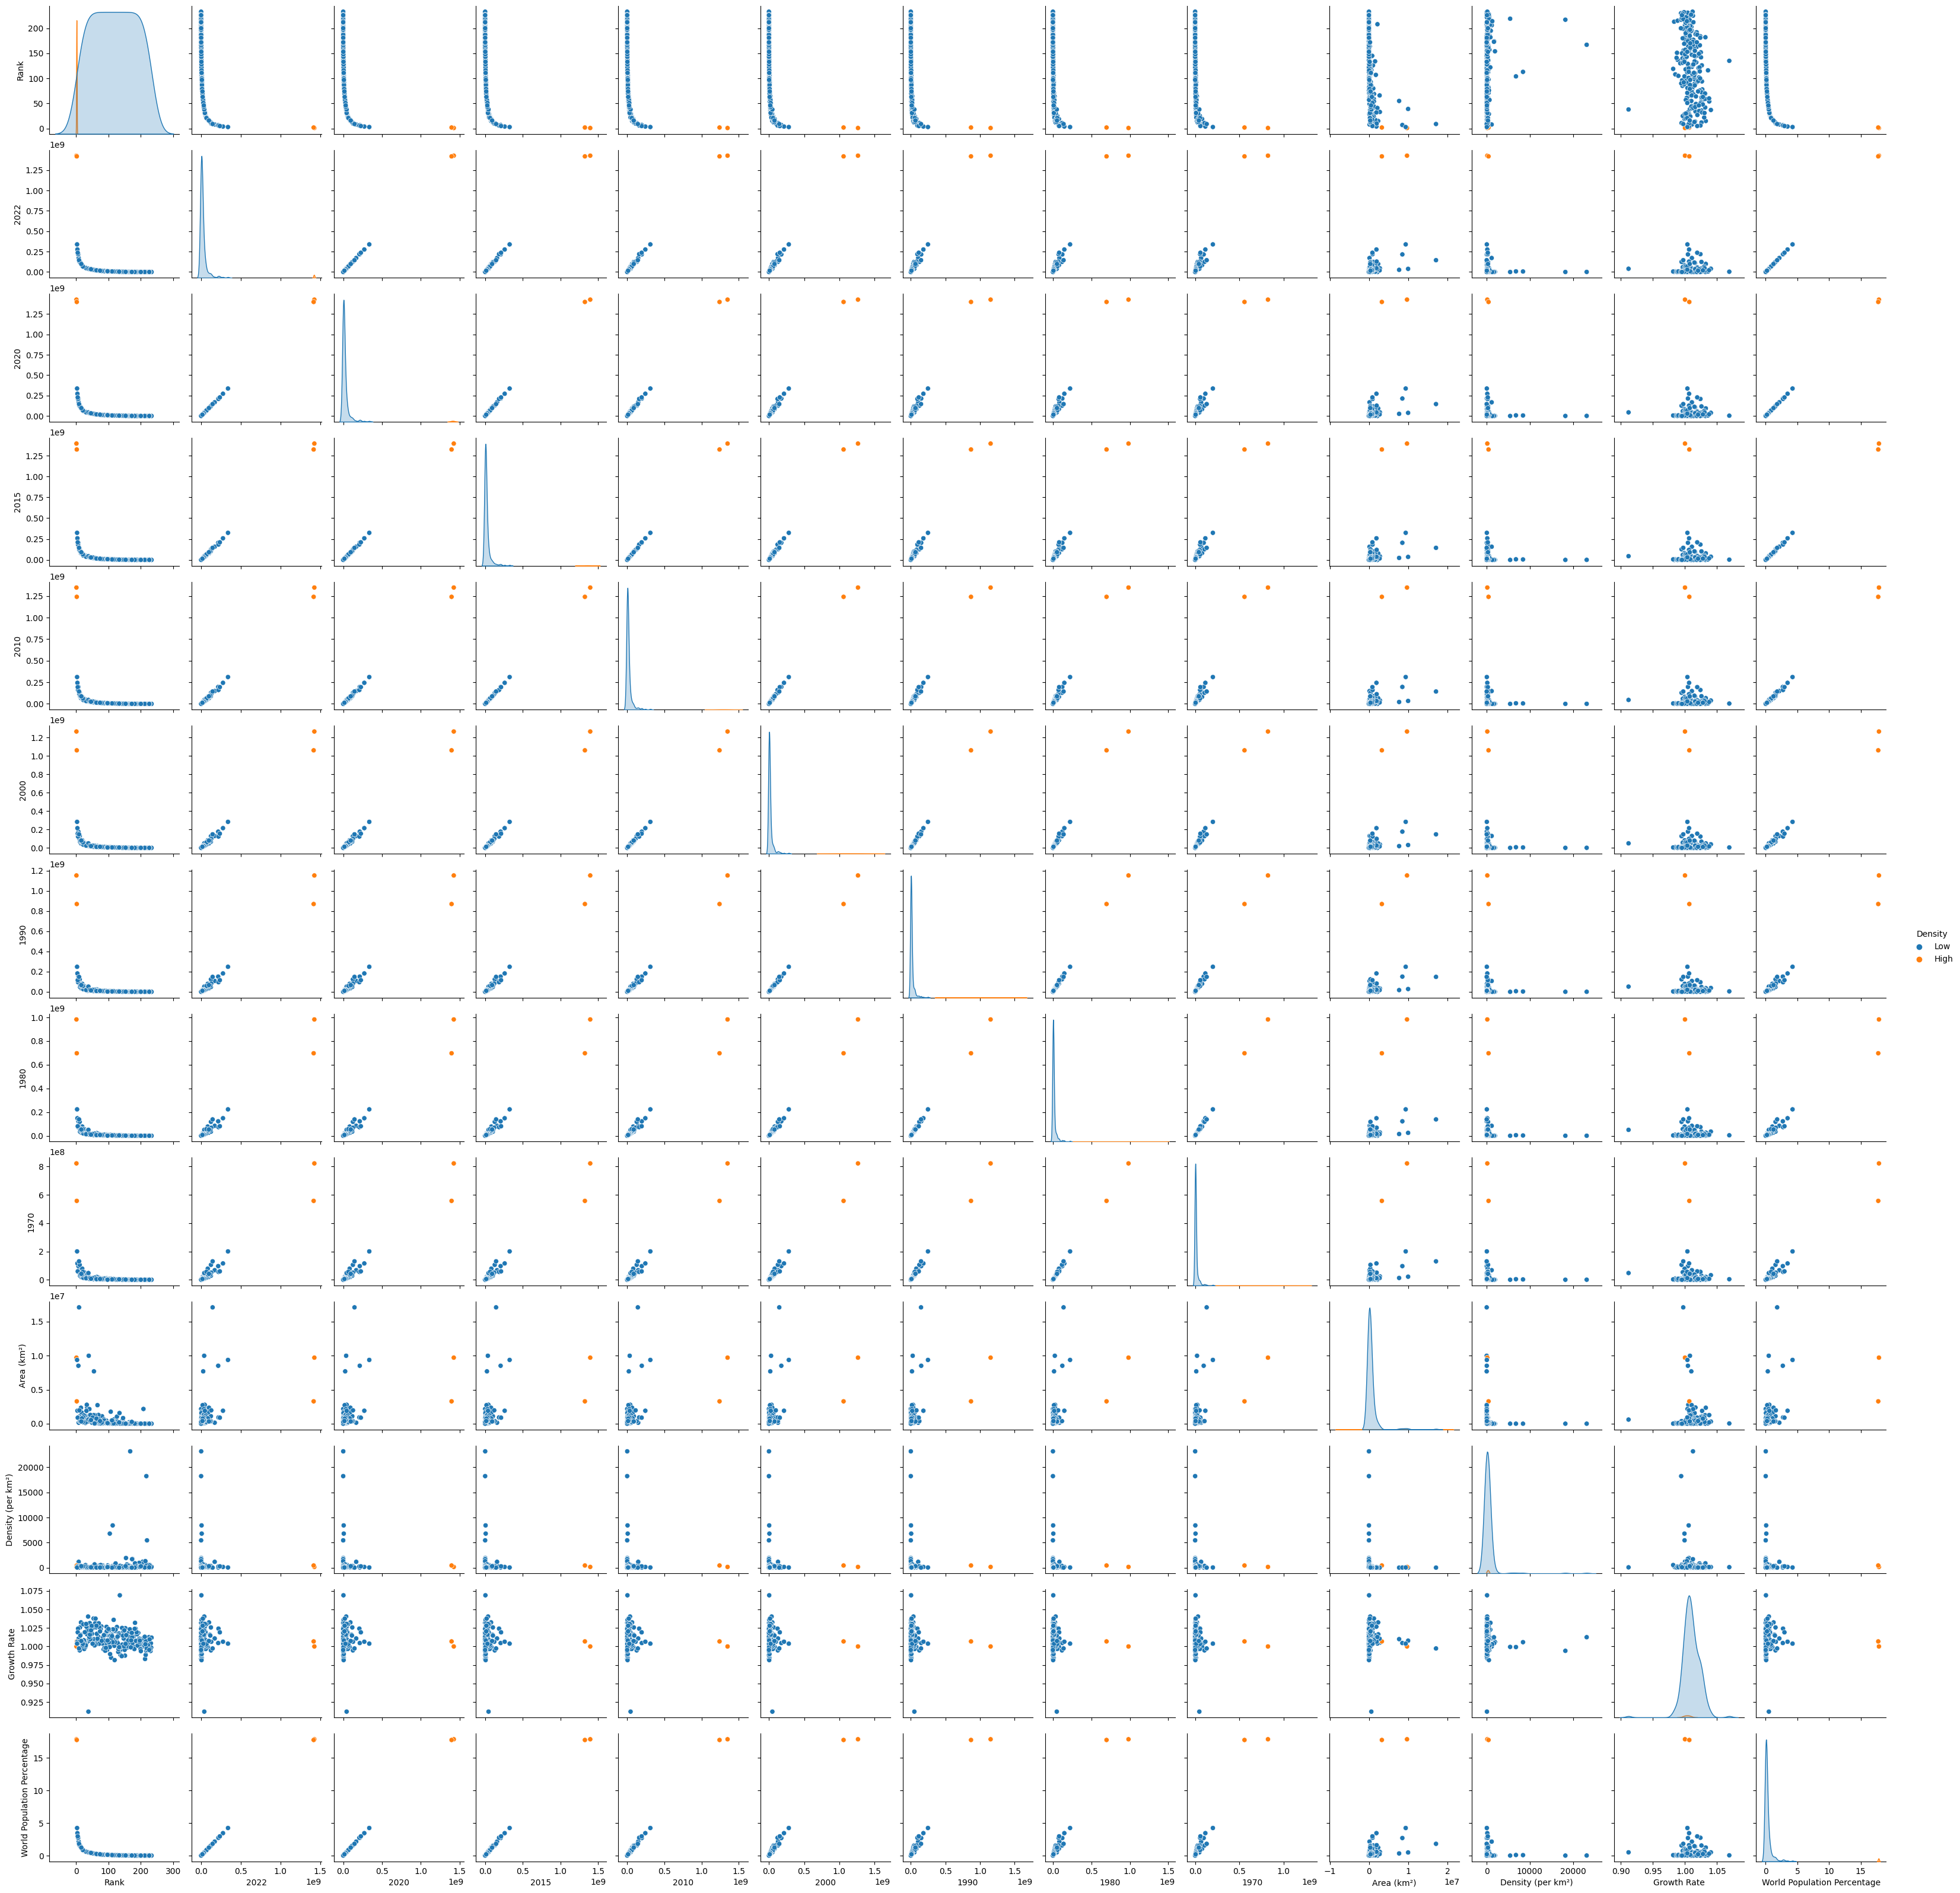

In [18]:
bins = np.linspace(min(df[2022]), max(df[2022]), 3)
df["Density"] = pd.cut(df[2022], bins, labels = ["Low", "High"])

sns.pairplot(data = df, hue = "Density")
plt.tight_layout
plt.show()

ANALIZAREMOS LOS 2 PAISE CON MAYOR POBLACION EN EL MUNDO

In [19]:
df_china_india = df.set_index("Country")
df_china_india = df_china_india.loc[["China", "India"],2022:1970]
df_china_india = df_china_india.transpose()
df_china_india.rename_axis("Years", axis = 1, inplace = True)
df_china_india

Years,China,India
2022,1425887337,1417173173
2020,1424929781,1396387127
2015,1393715448,1322866505
2010,1348191368,1240613620
2000,1264099069,1059633675
1990,1153704252,870452165
1980,982372466,696828385
1970,822534450,557501301


<Axes: >

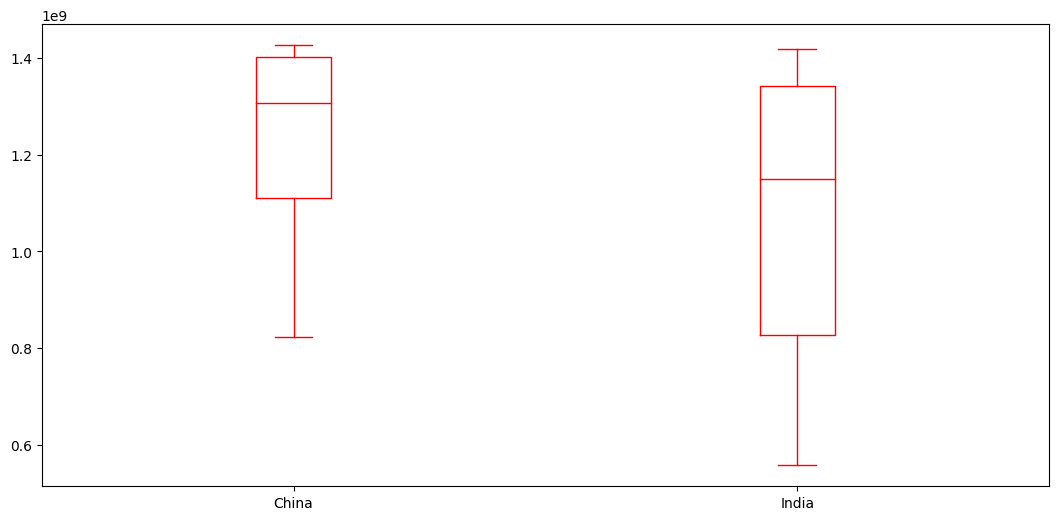

In [20]:
df_china_india.plot(kind = "box", color = 'red', figsize = (13, 6), vert = True)

AHORA ANALIZAREMOS LAS 3 ECONOMIAS MAS GRANDES EN EL MUNDO

In [21]:
df_economic = df.set_index("Country")
df_economic = df_economic.loc[:, 2022:1970].transpose()
df_economic = df_economic.loc[:, ["United States", "China", "Japan"]].reset_index()
df_economic.rename({"index":"Years"}, axis = 1, inplace = True)
df_economic.rename_axis(None, axis = 1, inplace = True)
df_economic.style.background_gradient(cmap = "YlOrRd").bar(subset = ["United States"], color = "darkblue")\
    .bar(subset = ["Japan"], color = "green")

,Years,United States,China,Japan
0,2022,338289857,1425887337,123951692
1,2020,335942003,1424929781,125244761
2,2015,324607776,1393715448,127250933
3,2010,311182845,1348191368,128105431
4,2000,282398554,1264099069,126803861
5,1990,248083732,1153704252,123686321
6,1980,223140018,982372466,117624196
7,1970,200328340,822534450,105416839


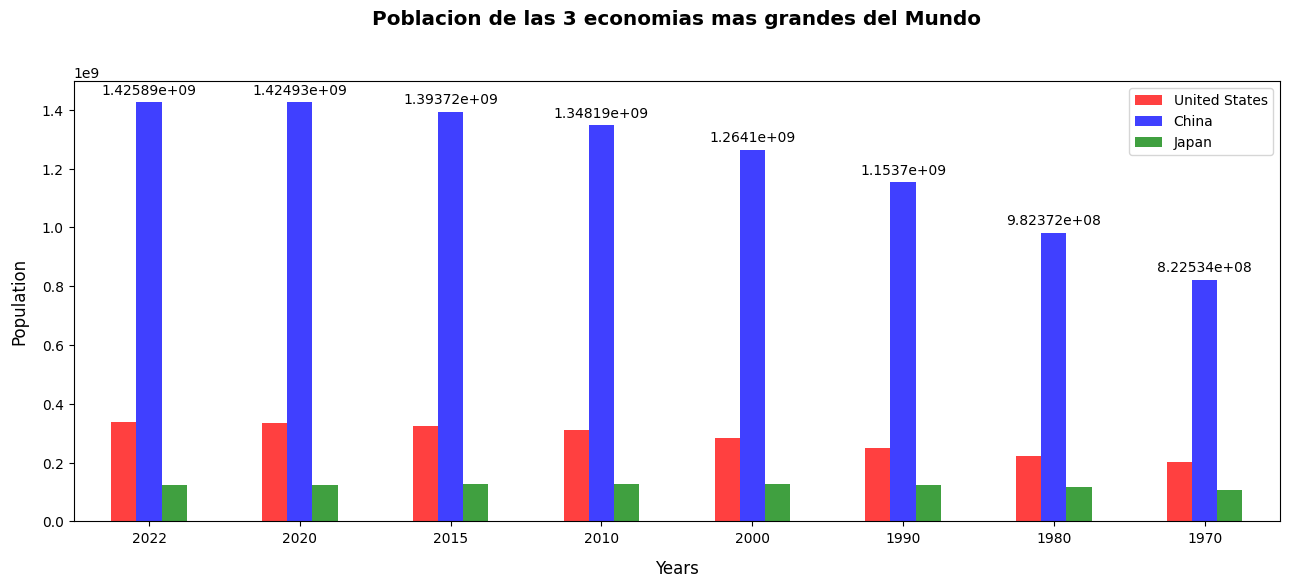

In [22]:
ax = df_economic.plot(kind = "bar", x = "Years", y =["United States", "China", "Japan"], figsize = (13, 6), 
            color = ["red", "blue", "green"],alpha = 0.75)
 
plt.title("Poblacion de las 3 economias mas grandes del Mundo", y = 1.11, fontsize = "x-large",
        fontweight = "bold")


plt.xlabel("Years", fontsize = "large", labelpad = 10)
plt.ylabel("Population", fontsize = "large", labelpad = 10)
plt.xticks(rotation = 0)

ax.bar_label(ax.containers[1], padding = 3.5)
plt.tight_layout()
plt.show()

RELACION ENTRE (AREA, CRECIMIENTO & PORCENTAJE)

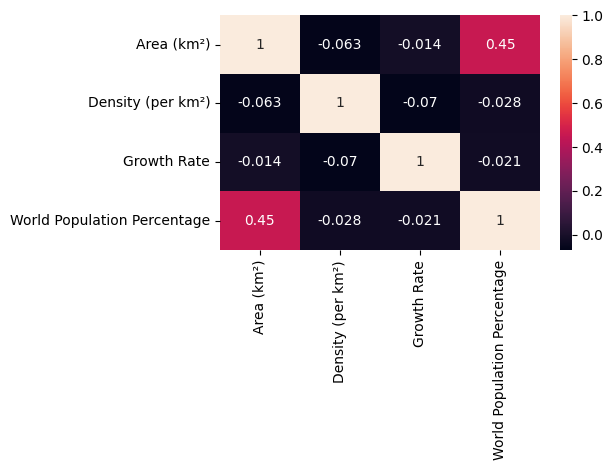

In [23]:
df_relationship = df[["Area (km²)", "Density (per km²)", 
                    "Growth Rate", "World Population Percentage"]].corr()
sns.heatmap(data = df_relationship, annot = True)
plt.tight_layout()
plt.show()